In [1]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [6]:


tubefile = "C:\\Users\\f002tj9\\Documents\\Research\\kj\\TubeFile2020\\ski1_tubelist.csv"

def readTubes(tubefile):
    # This function reads in a CSV and converts the tube data into a numpy array (and dataframe). 
    # Each row is a tube slice with the properties [x,y,a,b,rot,f.Vx,Vy,tubenum]
    
    print("Reading from:", tubefile)

    data = pd.read_csv(tubefile)
    #Saving all of the stuff into np arrays (vectors)

    X = np.asarray(data['x'])
    Y = np.asarray(data['y'])
    A = np.asarray(data['a'])
    B = np.asarray(data['b'])
    ROT = np.asarray(data['rot'])
    F = np.asarray(data['f'])
    VX = np.asarray(data['Vx'])
    VY = np.asarray(data['Vy'])
    TNUM = np.asarray(data['tubenum'])
    
    tubeMtx = np.transpose(np.asarray([X,Y,A,B,ROT,F,VX,VY,TNUM]))
    
    print("We have",len(TNUM) ,"tube slices and ", max(TNUM)+1, "tubes.")
    
    return tubeMtx, data


def getTube(tubeData, tubeNum):
    
    T = np.array([tubeData[i,:] for i in range(len(tubeData)) if DATA[i,8] ==tubeNum])
    return T


def showTubes(listOfTubes=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("frames")
    
    if (listOfTubes==None):
        for t in range(numTubes):
            T = getTube(DATA,t)
            f = T[:,5]
            x = T[:,0]
            y = T[:,1]
            ax.scatter(f,x,y)
    else:
        for t in range(numTubes):
            if t in listOfTubes:
                T = getTube(DATA,t)
                f = T[:,5]
                x = T[:,0]
                y = T[:,1]
                ax.scatter(f,x,y)
    plt.show()

In [7]:

DATA, df_data = readTubes(tubefile)
T = getTube(DATA, 4)
numTubes = int(DATA[-1,-1])

jumpyList = []

for t in range(numTubes+1):
    deltaD = 0
    i=0
    T = getTube(DATA,t)
    
    while(i+1 < T.shape[0]):
        deltaD += math.sqrt((T[i+1,0] - T[i,0])**2 + (T[i+1,1] - T[i,1])**2 )
        i+=1
    
    jumpiness = deltaD/T.shape[0]
    if jumpiness > 35:
        jumpyList.append(t)
        
    
    
    print("Tube", t, "has jumpiness factor = ", jumpiness, "across", T.shape[0], "frames")

Reading from: C:\Users\f002tj9\Documents\Research\kj\TubeFile2020\ski1_tubelist.csv
We have 7810 tube slices and  40 tubes.
Tube 0 has jumpiness factor =  18.162591287644656 across 90 frames
Tube 1 has jumpiness factor =  10.472847101984573 across 23 frames
Tube 2 has jumpiness factor =  22.004318699676293 across 44 frames
Tube 3 has jumpiness factor =  0.6610207179411819 across 112 frames
Tube 4 has jumpiness factor =  1.2150524462349626 across 608 frames
Tube 5 has jumpiness factor =  63.976635411589655 across 5 frames
Tube 6 has jumpiness factor =  0.4866162056115054 across 444 frames
Tube 7 has jumpiness factor =  106.51777076385088 across 31 frames
Tube 8 has jumpiness factor =  36.06492019744135 across 207 frames
Tube 9 has jumpiness factor =  33.11342943842045 across 110 frames
Tube 10 has jumpiness factor =  2.410848497946022 across 322 frames
Tube 11 has jumpiness factor =  2.267530549374647 across 175 frames
Tube 12 has jumpiness factor =  16.1846187141745 across 23 frames
Tu

[5, 7, 8, 13, 21, 23, 35]


<IPython.core.display.Javascript object>


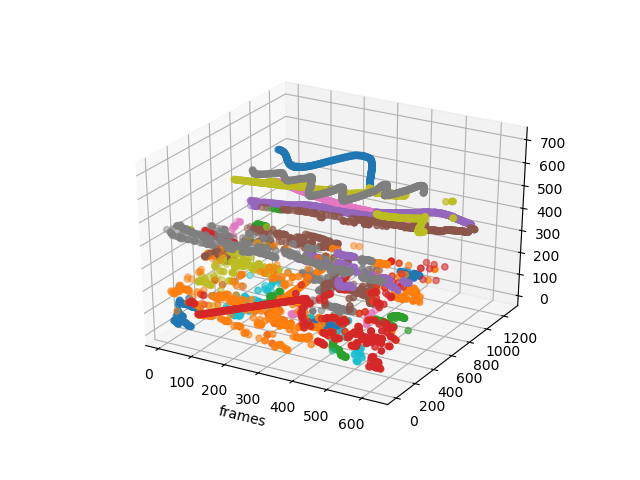

<IPython.core.display.Javascript object>


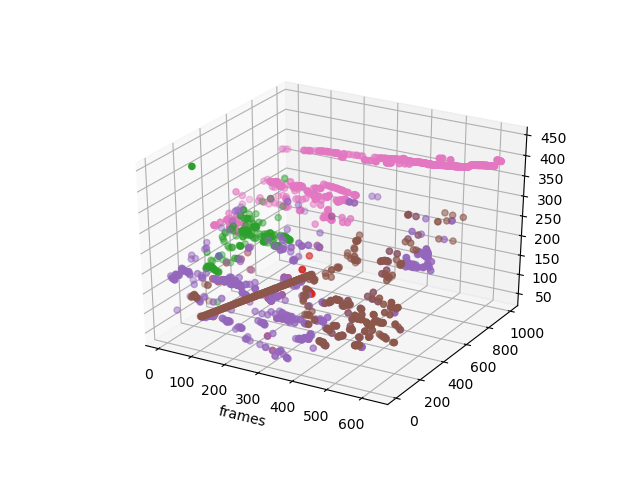

<IPython.core.display.Javascript object>


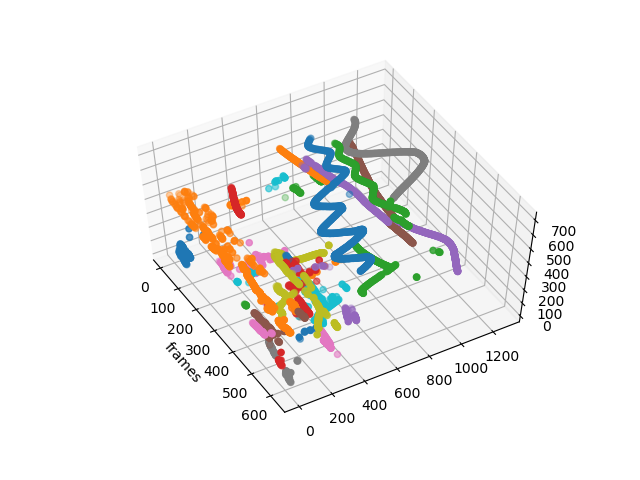

In [8]:
%matplotlib notebook

notjumpyList = [t for t in range(numTubes+1) if t not in jumpyList]
print(jumpyList)
showTubes()
showTubes(jumpyList)
showTubes(notjumpyList)